In [142]:
import pandas as pd
df = pd.read_pickle("/store/aug/train.pkl")
df['Score'].describe()

count    13731.000000
mean         2.024839
std          0.923629
min         -1.000000
25%          1.378398
50%          2.034227
75%          2.659013
max          4.673205
Name: Score, dtype: float64

In [143]:
df['Score'].sample(2048).describe()

count    2048.000000
mean        2.008371
std         0.913995
min        -1.000000
25%         1.366889
50%         2.013259
75%         2.626674
max         4.585434
Name: Score, dtype: float64

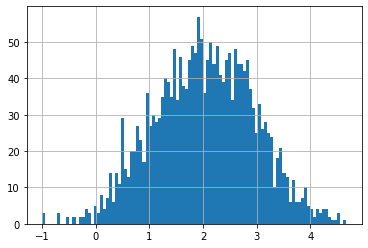

In [144]:
df['Score'].sample(2048).hist(bins=100)

In [146]:
df = pd.read_csv("http://192.168.10.7/aug/submit.csv", names=['id', 'Score'])
df.describe()

,id,Score
count,13732.000000,13732.000000
mean,13748.110399,1.628708
std,7964.603720,0.060280
min,1.000000,1.074227
25%,6807.500000,1.605112
50%,13778.500000,1.647435
75%,20651.250000,1.670696
max,27462.000000,1.779143


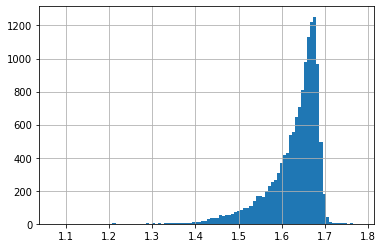

In [147]:
df['Score'].hist(bins=100)

In [149]:
df = pd.read_csv("http://192.168.10.8/aug/submit.csv", names=['id', 'Score'])
df['Score'].describe()

count    13732.000000
mean         1.334697
std          0.015528
min          1.304820
25%          1.324201
50%          1.331824
75%          1.342796
max          1.438563
Name: Score, dtype: float64

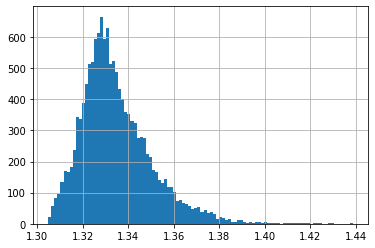

In [150]:
df['Score'].hist(bins=100)

In [151]:
df = pd.read_csv("http://192.168.10.8/aug/pre_submit.csv", names=['id', 'Score'])
df['Score'].describe()

count    13731.000000
mean         1.334697
std          0.015528
min          1.302822
25%          1.323997
50%          1.331937
75%          1.342983
max          1.439769
Name: Score, dtype: float64

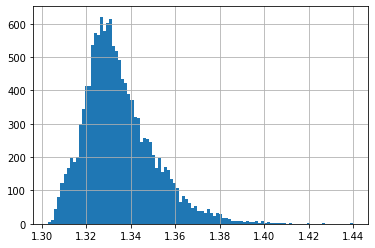

In [152]:
df['Score'].hist(bins=100)